
### О ЛР:

- scikit-learn & decision trees
- Coding decision tree & Categorical features



### Оценивание и штрафы


Каждая из задач имеет определенную «стоимость» (указана в скобках около задачи). Максимально допустимая оценка за работу — 5 баллов.

Задание выполняется самостоятельно. «Похожие» решения считаются плагиатом и все задействованные студенты не могут получить за него больше 0 баллов.

Неэффективная реализация кода может негативно отразиться на оценке.

#### Максимально возможная оценка - 5

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from matplotlib.colors import Colormap, ListedColormap
import pandas as pd
from sklearn.model_selection import train_test_split
import seaborn as sns

sns.set(style="whitegrid")

import warnings

warnings.filterwarnings("ignore")

# 1. Решающие деревья. Визуализация.

В этой части мы рассмотрим два простых двумерных датасета сделанных с помощью `make_moons`, `make_circles` и посмотрим как ведет себя разделяющая поверхность в зависимости от различных гиперпараметров.

In [2]:
from sklearn.datasets import make_moons, make_circles, make_classification

datasets = [
    make_circles(noise=0.2, factor=0.5, random_state=42),
    make_moons(noise=0.2, random_state=42),
    make_classification(
        n_classes=3,
        n_clusters_per_class=1,
        n_features=2,
        class_sep=0.8,
        random_state=3,
        n_redundant=0,
    ),
]

In [3]:
palette = sns.color_palette(n_colors=3)
cmap = ListedColormap(palette)

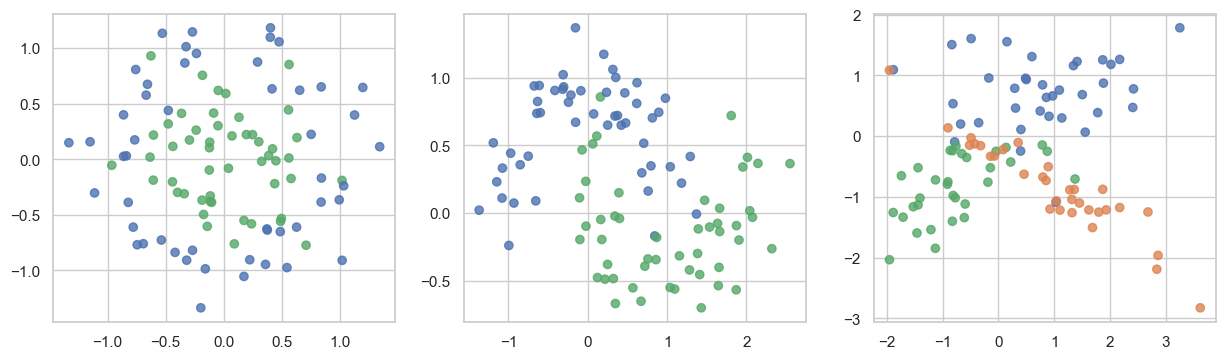

In [4]:
plt.figure(figsize=(15, 4))
for i, (x, y) in enumerate(datasets):
    plt.subplot(1, 3, i + 1)
    plt.scatter(x[:, 0], x[:, 1], c=y, cmap=cmap, alpha=0.8)

__Задание 1. [0.5 балла]__

Для каждого датасета обучите решающее дерево с параметрами по умолчанию, предварительно разбив выборку на обучающую и тестовую. Постройте разделящие поверхности (для этого воспользуйтесь функцией `plot_surface`, пример ниже). Посчитайте accuracy на обучающей и тестовой выборках. Сильно ли деревья переобучились?

In [5]:
def plot_surface(clf, X, y):
    plot_step = 0.01
    palette = sns.color_palette(n_colors=len(np.unique(y)))
    cmap = ListedColormap(palette)
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(
        np.arange(x_min, x_max, plot_step), np.arange(y_min, y_max, plot_step)
    )
    plt.tight_layout(h_pad=0.5, w_pad=0.5, pad=2.5)

    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    cs = plt.contourf(xx, yy, Z, cmap=cmap, alpha=0.3)

    plt.scatter(
        X[:, 0],
        X[:, 1],
        c=y,
        cmap=cmap,
        alpha=0.7,
        edgecolors=np.array(palette)[y],
        linewidths=2,
    )

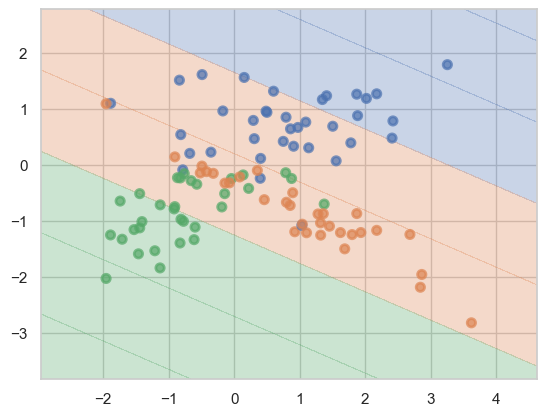

In [6]:
# Пример:
from sklearn.linear_model import LinearRegression

X, y = datasets[2]
lr = LinearRegression().fit(X, y)
plot_surface(lr, X, y)

Dataset Circles:
Train Accuracy: 1.0000
Test Accuracy:  0.7333
Overfitting: Yes



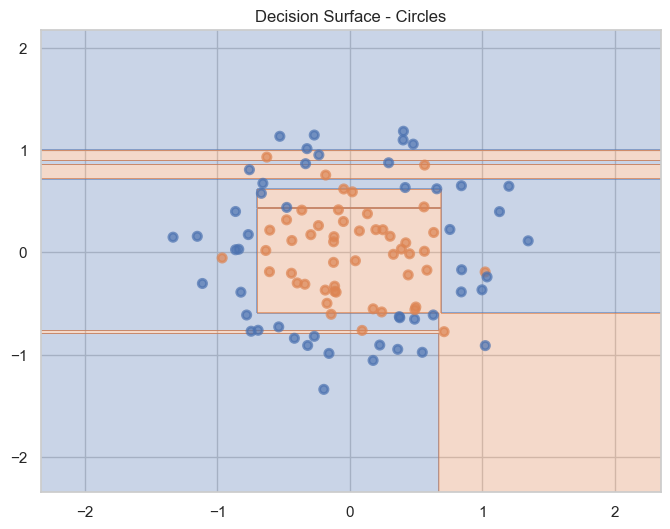

Dataset Moons:
Train Accuracy: 1.0000
Test Accuracy:  0.8667
Overfitting: Yes



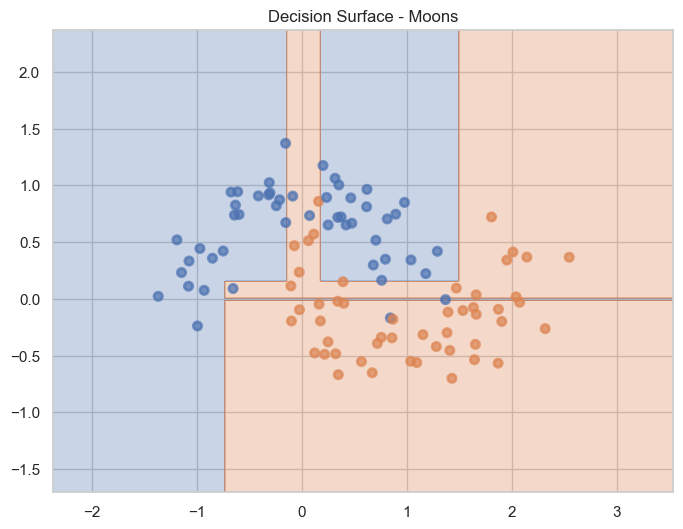

Dataset Classification:
Train Accuracy: 1.0000
Test Accuracy:  0.8333
Overfitting: Yes



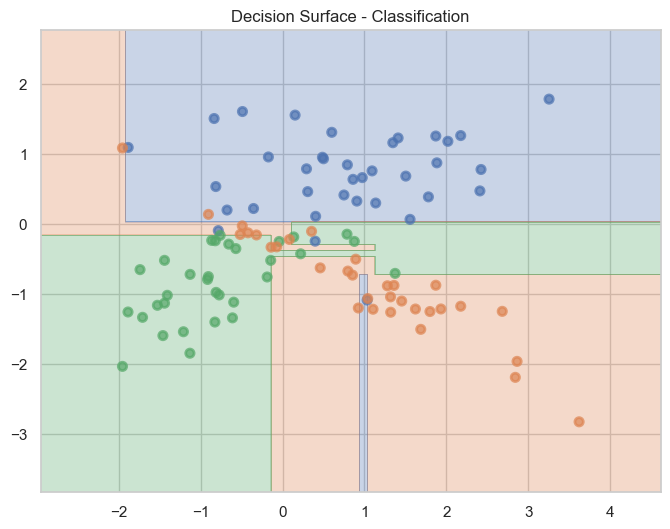

In [7]:
from sklearn.metrics import accuracy_score

titles = ["Circles", "Moons", "Classification"]

for idx, (X, y) in enumerate(datasets):
    print(f"Dataset {titles[idx]}:")

    # Разделение данных
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.3, random_state=42
    )

    # Обучение модели
    model = DecisionTreeClassifier(random_state=42)
    model.fit(X_train, y_train)

    # Accuracy
    train_acc = accuracy_score(y_train, model.predict(X_train))
    test_acc = accuracy_score(y_test, model.predict(X_test))

    print(f"Train Accuracy: {train_acc:.4f}")
    print(f"Test Accuracy:  {test_acc:.4f}")
    print(f"Overfitting: {'Yes' if train_acc > test_acc + 0.1 else 'No'}\n")

    # Визуализация
    plt.figure(figsize=(8, 6))
    plot_surface(model, X, y)
    plt.title(f"Decision Surface - {titles[idx]}")
    plt.show()

__Ответ:__ во всех трех случаях очевидное переобучение (трейн акьюреси = 1). Решающие деревья легко запоминают шум и особенности обучающих данных, поэтому не подходят для таких примитивных задач.

__Задание 2. [0.75 балла]__

Попробуйте перебрать несколько параметров для регуляризации (напр. `max_depth`, `min_samples_leaf`). Для каждого набора гиперпараметров постройте разделяющую поверхность, выведите обучающую и тестовую ошибки. Можно делать кросс-валидацию или просто разбиение на трейн и тест, главное делайте каждый раз одинаковое разбиение, чтобы можно было корректно сравнивать (помните же, что итоговое дерево сильно зависит от небольшого изменения обучающей выборки?). Проследите как меняется разделяющая поверхность и обобщающая способность. Почему так происходит, одинаково ли изменение для разных датасетов?



--- Dataset: Circles ---
Params: {'max_depth': None, 'min_samples_leaf': 1}
Train Acc: 1.0000, Test Acc: 0.7333, Overfit: 0.2667

Params: {'max_depth': 3, 'min_samples_leaf': 1}
Train Acc: 0.8857, Test Acc: 0.7333, Overfit: 0.1524

Params: {'max_depth': 5, 'min_samples_leaf': 1}
Train Acc: 0.9714, Test Acc: 0.7667, Overfit: 0.2048

Params: {'max_depth': None, 'min_samples_leaf': 5}
Train Acc: 0.8714, Test Acc: 0.9000, Overfit: -0.0286



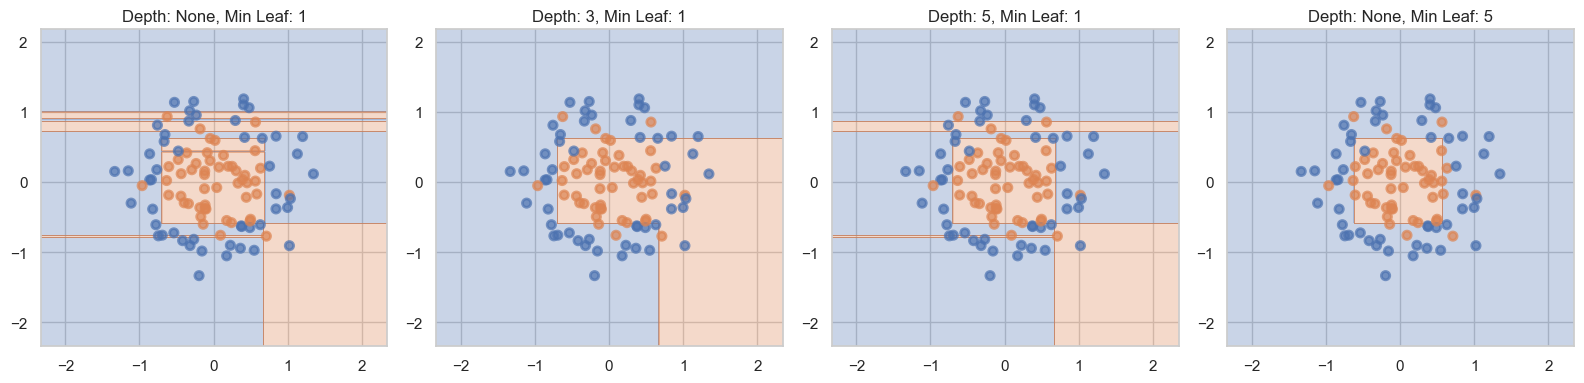



--- Dataset: Moons ---
Params: {'max_depth': None, 'min_samples_leaf': 1}
Train Acc: 1.0000, Test Acc: 0.8667, Overfit: 0.1333

Params: {'max_depth': 3, 'min_samples_leaf': 1}
Train Acc: 0.9143, Test Acc: 0.9333, Overfit: -0.0190

Params: {'max_depth': 5, 'min_samples_leaf': 1}
Train Acc: 1.0000, Test Acc: 0.8667, Overfit: 0.1333

Params: {'max_depth': None, 'min_samples_leaf': 5}
Train Acc: 0.9571, Test Acc: 0.7333, Overfit: 0.2238



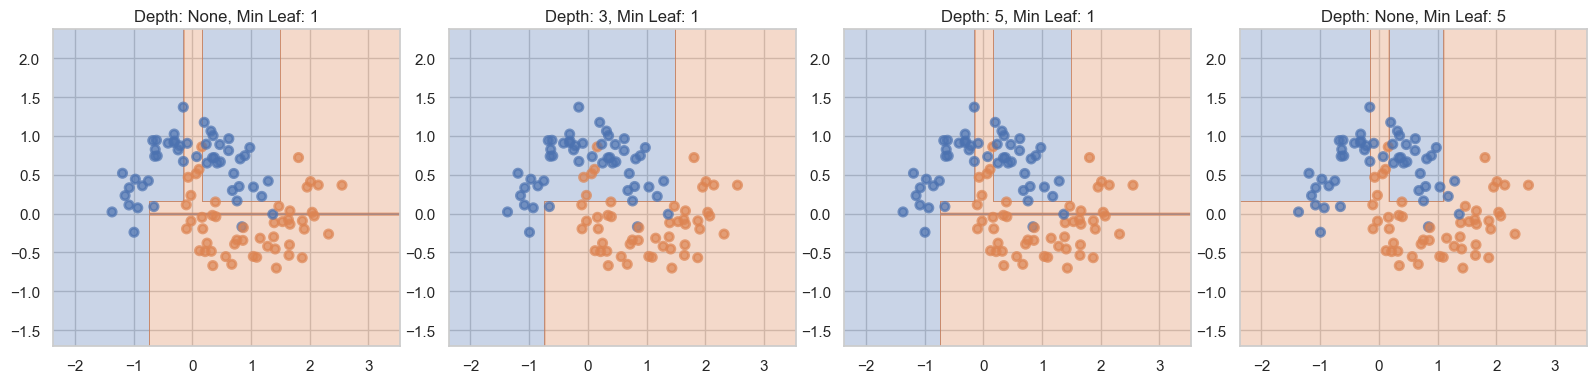



--- Dataset: Classification ---
Params: {'max_depth': None, 'min_samples_leaf': 1}
Train Acc: 1.0000, Test Acc: 0.8333, Overfit: 0.1667

Params: {'max_depth': 3, 'min_samples_leaf': 1}
Train Acc: 0.9429, Test Acc: 0.8667, Overfit: 0.0762

Params: {'max_depth': 5, 'min_samples_leaf': 1}
Train Acc: 0.9714, Test Acc: 0.8000, Overfit: 0.1714

Params: {'max_depth': None, 'min_samples_leaf': 5}
Train Acc: 0.9000, Test Acc: 0.7000, Overfit: 0.2000



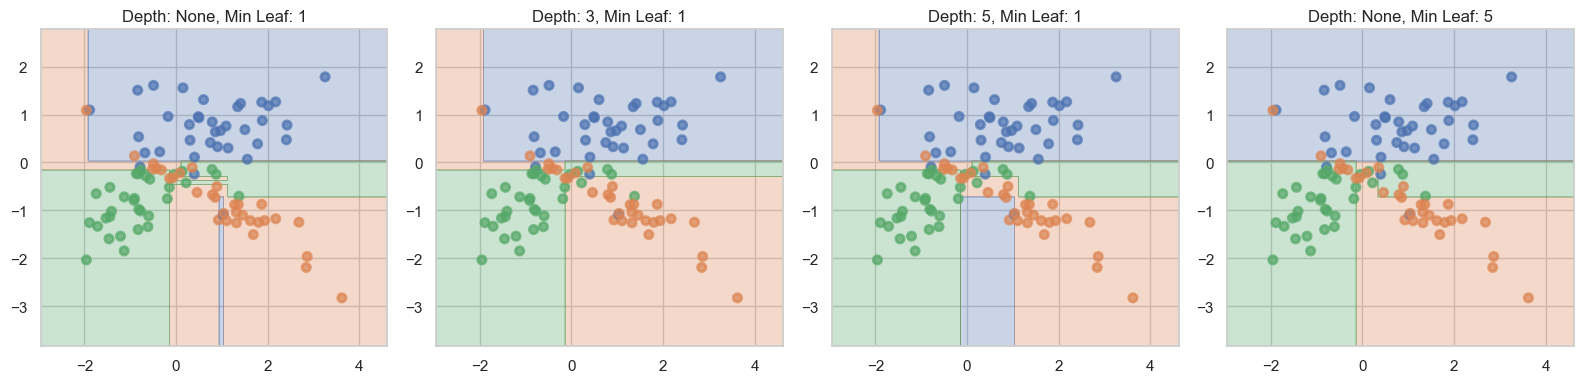

In [8]:
random_state_split = 42

splits = []

for X, y in datasets:
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.3, random_state=random_state_split
    )
    splits.append((X_train, X_test, y_train, y_test))

params_grid = [
    {"max_depth": None, "min_samples_leaf": 1},     # без регуляризации (базовая модель)
    {"max_depth": 3, "min_samples_leaf": 1},
    {"max_depth": 5, "min_samples_leaf": 1},
    {"max_depth": None, "min_samples_leaf": 5},
]

figsize = (16, 4)

for ds_idx, ((X, y), (X_train, X_test, y_train, y_test)) in enumerate(zip(datasets, splits)):
    plt.figure(figsize=figsize)
    print(f"\n\n--- Dataset: {titles[ds_idx]} ---")

    for p_idx, params in enumerate(params_grid):
        model = DecisionTreeClassifier(**params, random_state=42)
        model.fit(X_train, y_train)

        train_acc = accuracy_score(y_train, model.predict(X_train))
        test_acc = accuracy_score(y_test, model.predict(X_test))

        print(f"Params: {params}")
        print(f"Train Acc: {train_acc:.4f}, Test Acc: {test_acc:.4f}, Overfit: {train_acc - test_acc:.4f}\n")

        # разделяющая поверхность
        plt.subplot(1, len(params_grid), p_idx + 1)
        plot_surface(model, X, y)
        plt.title(f"Depth: {params['max_depth']}, Min Leaf: {params['min_samples_leaf']}")

    plt.tight_layout()
    plt.show()

__Ответ:__ 
1. Для Circles наиболее эффективная регуляризация — увеличение min_samples_leaf до 5 , которое уменьшает переобучение и улучшает обобщающую способность.
2. Для Moons наилучшая регуляризация — ограничение max_depth=3 . Она позволяет построить достаточно гладкую разделяющую поверхность, которая хорошо обобщается.
3. Для Classification также оптимальным является ограничение max_depth=3 , которое сохраняет баланс между сложностью модели и обобщающей способностью

# 2. Решающие деревья своими руками

В этой части вам нужно реализовать свой класс для обучения решающего дерева в задаче бинарной классификации с возможностью обработки вещественных и категориальных признаков.

__Задание 3. [0.75 балл]__

Реализуйте функцию `find_best_split` из модуля `tree_code.py`

__Задание 4. [0.25 балла]__

`students.csv` - это преобразованный датасет [User Knowledge](https://archive.ics.uci.edu/ml/datasets/User+Knowledge+Modeling)). Первые пять столбцов содержат признаки каждого объекта, а последний столбец — целевую переменную (класс: 0 или 1). Нужно построить график, который на одном изображении отобразит пять кривых "порог — значение критерия Джини" для всех пяти признаков. Кроме того, стоит отдельно визуализировать scatter-графики "значение признака — класс" для каждого из пяти признаков.

Это нужно и для выявления значимости признаков, и для пороговых значений. Да и глазу приятно

In [9]:
from tree_code import find_best_split

df = pd.read_csv("students.csv")

# Первые 5 столбцов — признаки, последний — целевая переменная
X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values

feature_names = df.columns[:-1].tolist()

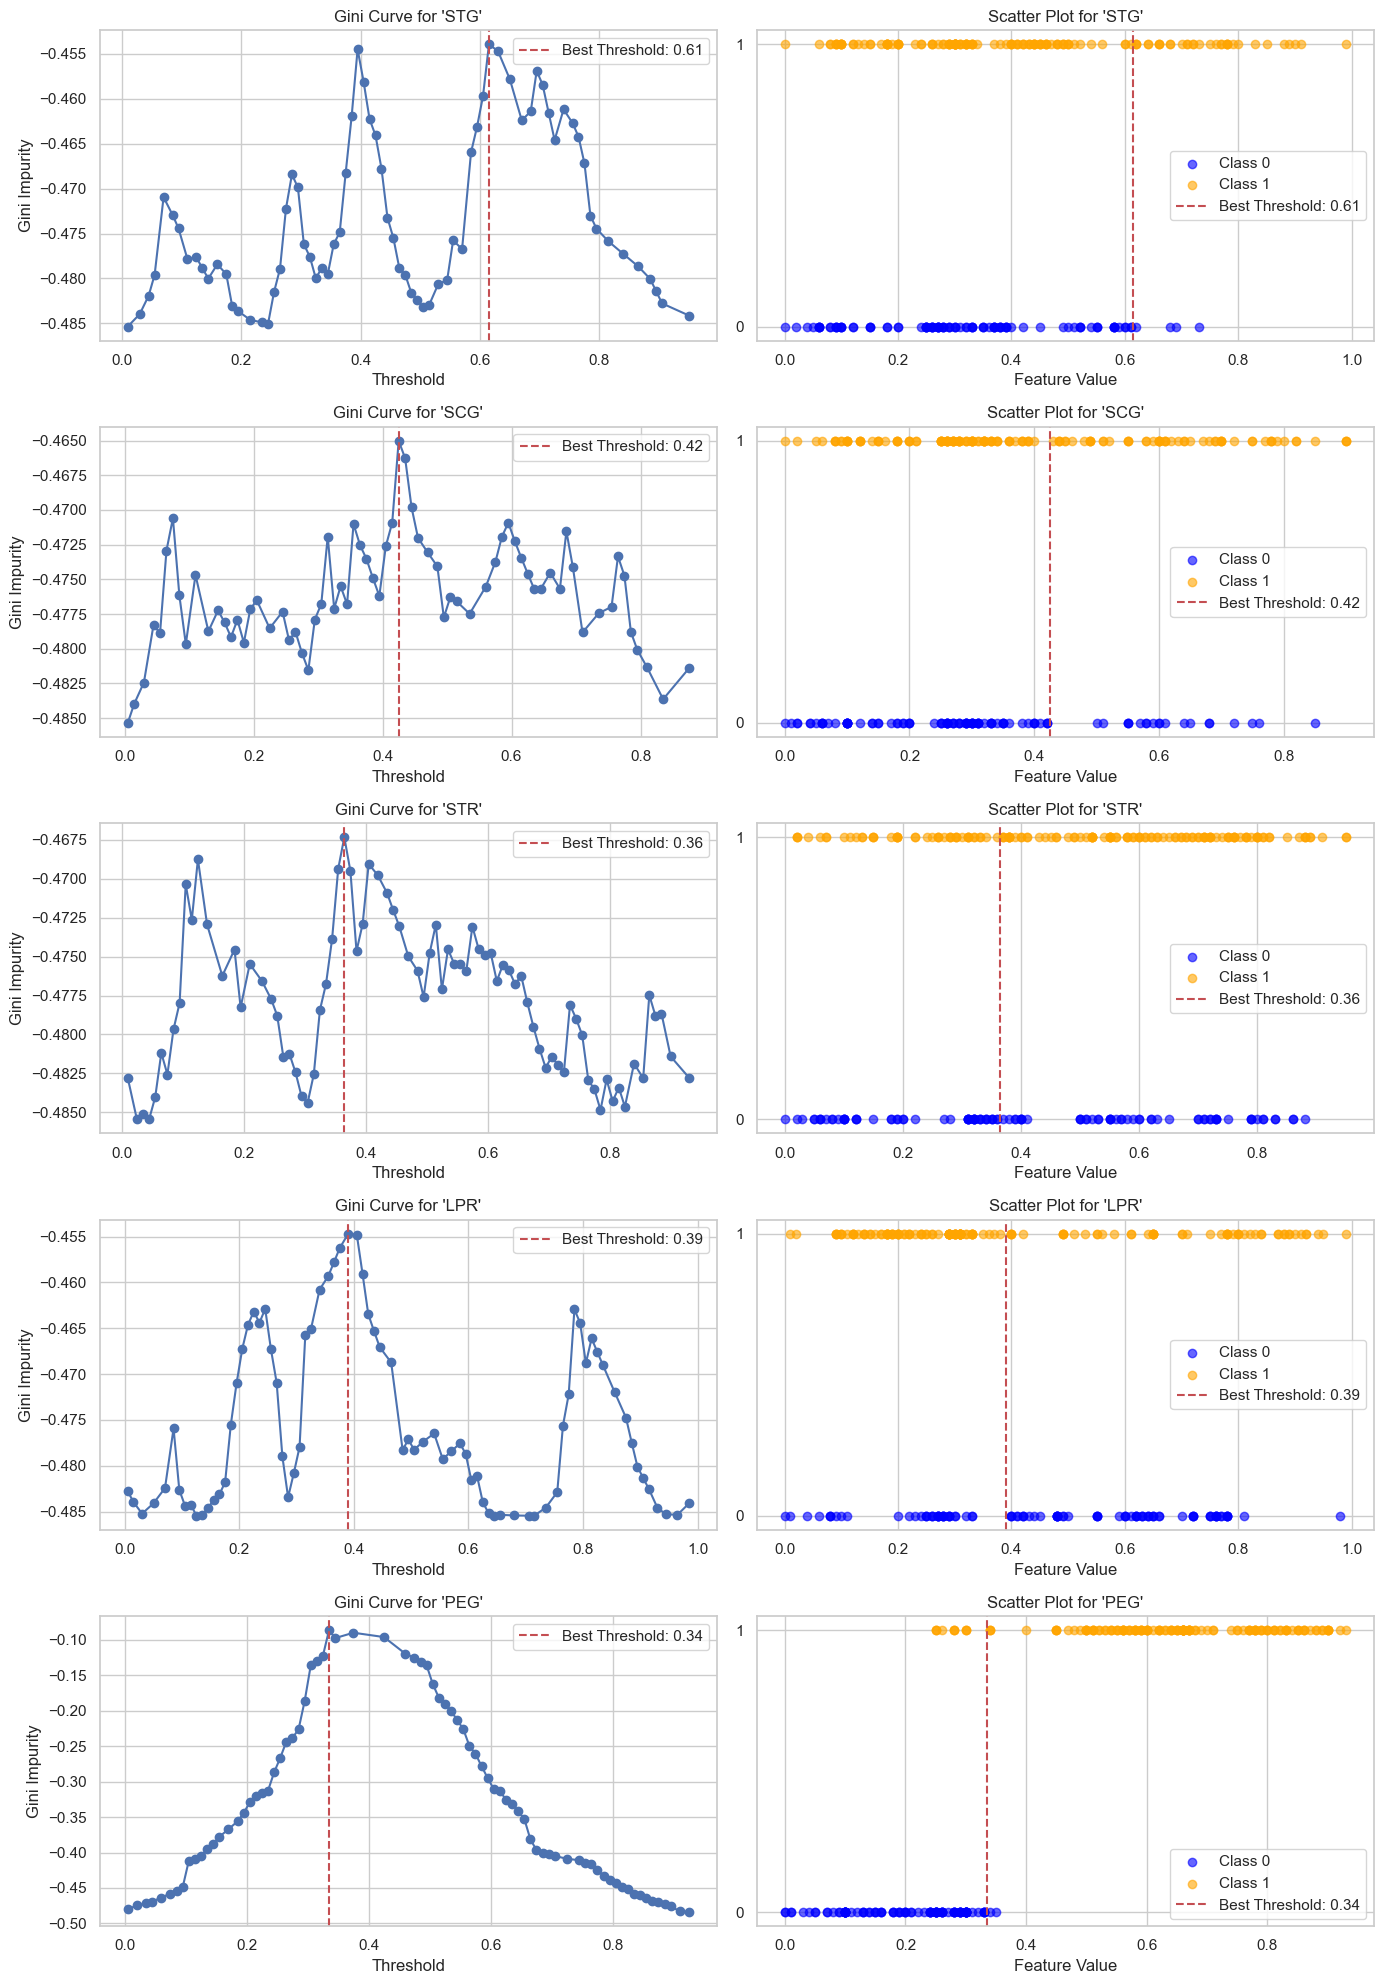

In [10]:
fig, axes = plt.subplots(5, 2, figsize=(14, 20))

for i in range(5):
    feature_vector = X[:, i]
    target_vector = y

    thresholds, ginis, threshold_best, gini_best = find_best_split(feature_vector, target_vector)

    # График зависимости Джини от порога
    ax = axes[i, 0]
    if len(thresholds) > 0:
        ax.plot(thresholds, ginis, marker="o", linestyle="-")
        ax.axvline(threshold_best, color="r", linestyle="--", label=f"Best Threshold: {threshold_best:.2f}")
        ax.set_title(f"Gini Curve for '{feature_names[i]}'")
        ax.set_xlabel("Threshold")
        ax.set_ylabel("Gini Impurity")
        ax.legend()
        ax.grid(True)
    else:
        ax.text(0.5, 0.5, "No split possible", ha="center", va="center")
        ax.set_title(f"No Split — '{feature_names[i]}'")

    # Scatter plot: feature value vs class
    ax = axes[i, 1]
    ax.scatter(feature_vector[y == 0], y[y == 0], c="blue", label="Class 0", alpha=0.6)
    ax.scatter(feature_vector[y == 1], y[y == 1], c="orange", label="Class 1", alpha=0.6)
    if threshold_best is not None:
        ax.axvline(threshold_best, color="r", linestyle="--", label=f"Best Threshold: {threshold_best:.2f}")
    ax.set_title(f"Scatter Plot for '{feature_names[i]}'")
    ax.set_xlabel("Feature Value")
    ax.set_yticks([0, 1])
    ax.legend()
    ax.grid(True)

plt.tight_layout()
plt.show()

__Задание 5. [0.25 балла]__

На основании кривых критерия Джини, по какому признаку стоит разделить выборку на два поддерева? Совпадает ли этот выбор с визуальной оценкой scatter-графиков? Как бы вы описали вид кривой для "хороших" признаков, по которым выборка делится почти идеально, и чем кривые таких признаков отличаются от кривых признаков, по которым разделение практически невозможно?

**Ответ:** 
- Признак STG:
кривая Джини имеет выраженный пик, соответствующий оптимальному порогу разбиения (~0.61).
Scatter-график показывает, что значения признака STG действительно хорошо делятся на два класса около порога 0.61.
Этот признак кажется наиболее информативным.
- Признак SCG:
кривая Джини также имеет заметный пик (~0.42), но менее выраженный, чем у STG.
Scatter-график показывает, что классы немного пересекаются, но всё же можно найти хороший порог разбиения.
- Признак STR:
кривая Джини имеет пик (~0.36), но он не так резкий, как у STG.
Scatter-график показывает, что классы имеют некоторое пересечение, но всё ещё можно эффективно разделить их.
- Признак LPR:
кривая Джини имеет пик (~0.39), но он менее резкий, чем у STG.
Scatter-график показывает, что классы имеют заметное пересечение, особенно в диапазоне значений [0.3–0.5].
- Признак PEG:
кривая Джини имеет очень резкий пик (~0.34), указывая на то, что это отличный порог для разделения.
Scatter-график подтверждает это: классы почти полностью разделены на две группы.

Лучшие признаки для разделения: STG и PEG.
Эти признаки имеют выраженные пики на кривых Джини и хорошо разделённые классы на scatter-графиках.
Для всех признаков, где кривая Джини имеет выраженный пик , scatter-графики подтверждают, что классы действительно могут быть разделены на этом пороге.

**Хорошие признаки:**

Характеристики кривой Джини :
- Имеют выраженный глубокий минимум.
- Минимум находится в области, где классы хорошо разделены.
- После минимума кривая обычно становится более плоской, указывая на стабильность разделения.

Примеры на графиках:

STG: Кривая имеет глубокий минимум около порога 0.61.

PEG: Кривая имеет очень резкий минимум около порога 0.34.

**Плохие признаки:**

Характеристики кривой Джини:
- Минимумы слабо выражены или отсутствуют.
- Кривая Джини имеет много шумов и небольшой разброс значений.
- Нет чёткого порога, который существенно улучшает разделение.

Примеры на графиках:

Если бы какой-то из признаков имел плохое разделение, его кривая Джини была бы более плоской, без выраженного минимума.

__Задание 6. [0.75 балла].__

Разберитесь с уже написанным кодом в классе DecisionTree модуля tree_code.py. Найдите ошибки в реализации метода \_fit_node. Напишите функцию \_predict_node.

 Построение дерева осуществляется согласно базовому жадному алгоритму, предложенному в лекции. Выбор лучшего разбиения необходимо производить по критерию Джини. Критерий останова: все объекты в листе относятся к одному классу или ни по одному признаку нельзя разбить выборку. Ответ в листе: наиболее часто встречающийся класс в листе. Для категориальных признаков выполняется преобразование, описанное в лекции в разделе «Учет категориальных признаков».




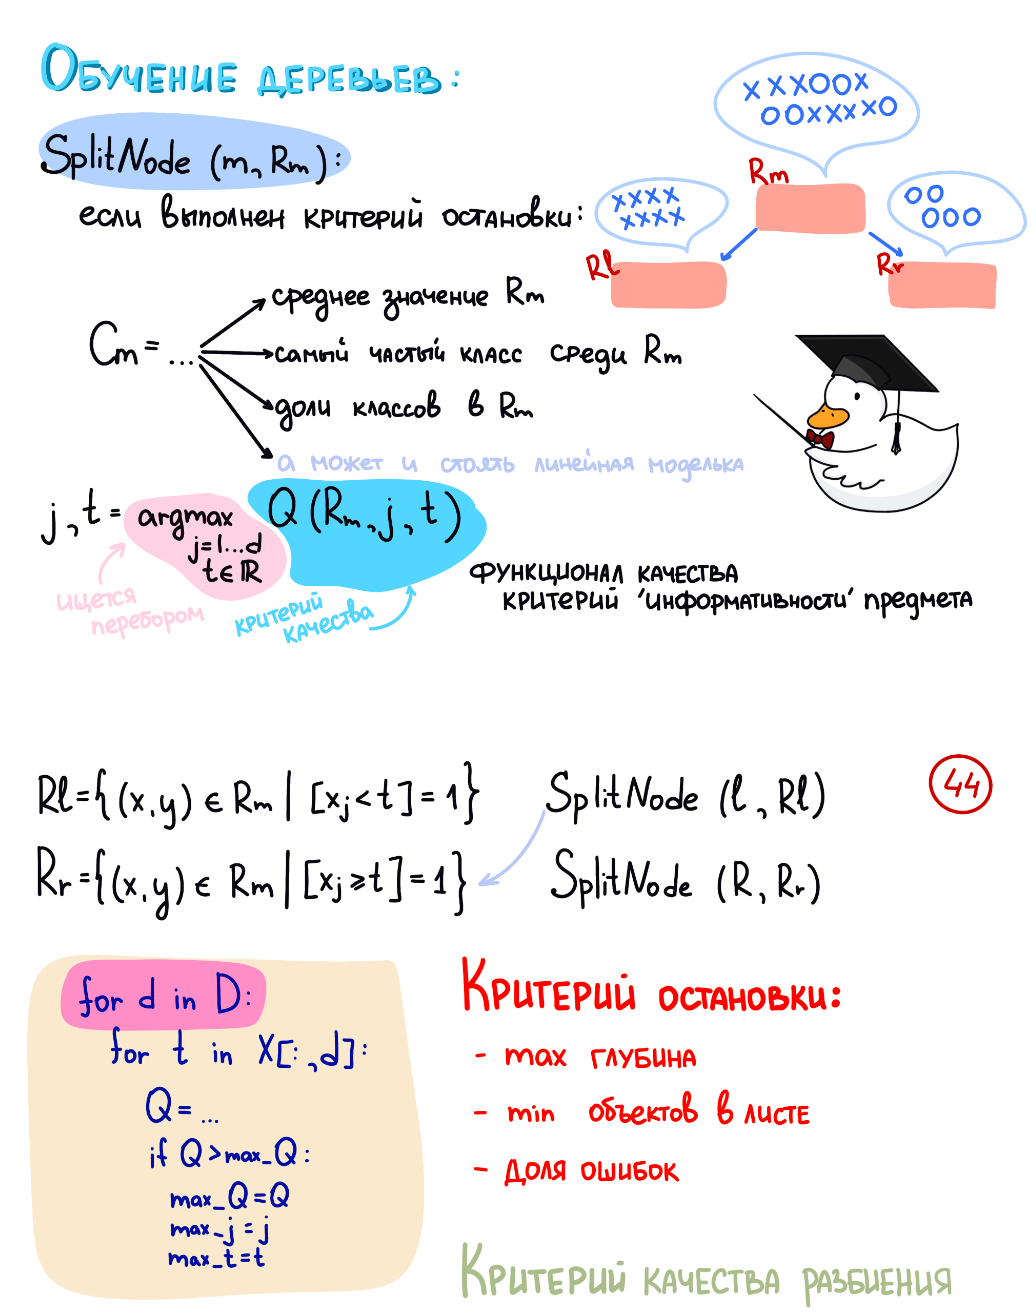

__Задание 7. [0.25 балла]__

Протестируйте свое решающее дерево на датасете [mushrooms](https://archive.ics.uci.edu/ml/datasets/Mushroom). Вам нужно открыть` agaricus-lepiota.data`, прочитать ее с помощью pandas (не забудьте про `agaricus-lepiota.names`), применить к каждому столбцу LabelEncoder (из sklearn), чтобы преобразовать строковые имена категорий в натуральные числа. Первый столбец — это целевая переменная (e — edible, p — poisonous) Мы будем измерять качество с помощью accuracy, так что нам не очень важно, что будет классом 1, а что — классом 0. Обучите решающее дерево на половине случайно выбранных объектов (признаки в датасете категориальные) и сделайте предсказания для оставшейся половины. Вычислите accuracy.

_SPOILER: У вас должно получиться значение accuracy, равное единице (или очень близкое к единице), и не очень глубокое дерево_

In [11]:
from tree_code import DecisionTree
from sklearn.preprocessing import LabelEncoder

columns = [
    'class', 'cap-shape', 'cap-surface', 'cap-color', 'bruises', 'odor',
    'gill-attachment', 'gill-spacing', 'gill-size', 'gill-color', 'stalk-shape',
    'stalk-root', 'stalk-surface-above-ring', 'stalk-surface-below-ring',
    'stalk-color-above-ring', 'stalk-color-below-ring', 'veil-type', 'veil-color',
    'ring-number', 'ring-type', 'spore-print-color', 'population', 'habitat'
]

df = pd.read_csv("agaricus-lepiota.data", header=None, names=columns)

# Целевая переменная: e -> 0 (съедобный), p -> 1 (ядовитый)
X = df.drop('class', axis=1).values
y = df['class'].apply(lambda x: 0 if x == 'e' else 1).values

for i in range(X.shape[1]):
    le = LabelEncoder()
    X[:, i] = le.fit_transform(X[:, i])

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [13]:
# Обучение дерева
feature_types = ["categorical"] * X.shape[1]
tree = DecisionTree(feature_types=feature_types, max_depth=5)
tree.fit(X_train, y_train)

preds = tree.predict(X_test)
acc = accuracy_score(y_test, preds)
print(f"Accuracy: {acc:.4f}")

Accuracy: 0.9982


__Задание 8. [1 балл]__

Загрузите следующие наборы данных, предварительно ознакомившись с описанием признаков и целевой переменной в каждом из них (она записаны в Data Folder, в файле *.names):
* [mushrooms](https://archive.ics.uci.edu/ml/datasets/Mushroom) (загрузили в предыдущем пункте, классы записаны в нулевом столбце)
* [tic-tac-toe](https://archive.ics.uci.edu/ml/datasets/Tic-Tac-Toe+Endgame) (классы записаны в последнем столбце, датасет лежит на гитхабе вместе с заданием)
* [cars](https://archive.ics.uci.edu/ml/datasets/Car+Evaluation) (классы записаны в последнем столбце, считаем что unacc, acc — это класс 0, good, vgood — класс 1)
* [nursery](https://archive.ics.uci.edu/ml/datasets/Nursery) (классы записаны в последнем столбце, считаем, что not_recom и recommend — класс 0, very_recom, priority, spec_prior — класс 1).

**Задача**:

Закодировать категориальные признаки в наборе данных с использованием `LabelEncoder`. Затем, применив `cross_val_score` (cv=10), оценить метрику accuracy для следующих алгоритмов:

1. **DecisionTree**, обрабатывающий все признаки как вещественные.
2. **DecisionTree**, обрабатывающий все признаки как категориальные.
3. **DecisionTree**, обрабатывающий все признаки как вещественные + one-hot encoding всех признаков.
4. **DecisionTreeClassifier** из `sklearn`.

**Инструкция**:
1. Закодировать категориальные признаки с помощью `LabelEncoder`.
2. Оценить accuracy, используя `cross_val_score` (cv=10) и `scoring=make_scorer(accuracy_score)`.
3. Если позволяет память, установить параметр `sparse=False` в `OneHotEncoder`.
4. Результаты сохранить в `pd.DataFrame` (по строкам — наборы данных, по столбцам — алгоритмы).

**Рекомендации**:
- Для вычисления точности используйте `scoring=make_scorer(accuracy_score)` из `sklearn.metrics`.

In [14]:
def load_data(name):
    if name == 'mushrooms':
        df = pd.read_csv('agaricus-lepiota.data', header=None)
        X = df.iloc[:, 1:]
        y = df.iloc[:, 0].apply(lambda x: 1 if x == 'p' else 0)
    elif name == 'tic-tac-toe':
        df = pd.read_csv('tic-tac-toe-endgame.csv', header=None)
        X = df.iloc[:, :-1]
        y = df.iloc[:, -1].apply(lambda x: 1 if x == 'positive' else 0)
    elif name == 'cars':
        df = pd.read_csv('car.data', header=None)
        X = df.iloc[:, :-1]
        y = df.iloc[:, -1].apply(lambda x: 1 if x in ['good', 'vgood'] else 0)
    elif name == 'nursery':
        df = pd.read_csv('nursery.data', header=None)
        X = df.iloc[:, :-1]
        y = df.iloc[:, -1].apply(lambda x: 1 if x in ['very_recom', 'priority', 'spec_prior'] else 0)
    return X, y

datasets = ['mushrooms', 'tic-tac-toe', 'cars', 'nursery']

In [20]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.base import BaseEstimator, ClassifierMixin
from sklearn.model_selection import cross_val_score
from sklearn.metrics import make_scorer, accuracy_score
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

from tree_code import CustomDecisionTree

# Обучение и оценка моделей

def evaluate_model(model, X, y):
    scorer = make_scorer(accuracy_score)
    try:
        scores = cross_val_score(model, X, y, cv=10, scoring=scorer)
        return scores.mean()
    except Exception as e:
        print(f"Ошибка при оценке модели: {e}")
        return np.nan


# Загрузка датасетов
def load_mushrooms():
    columns = [
        'class', 'cap-shape', 'cap-surface', 'cap-color', 'bruises', 'odor',
        'gill-attachment', 'gill-spacing', 'gill-size', 'gill-color', 'stalk-shape',
        'stalk-root', 'stalk-surface-above-ring', 'stalk-surface-below-ring',
        'stalk-color-above-ring', 'stalk-color-below-ring', 'veil-type', 'veil-color',
        'ring-number', 'ring-type', 'spore-print-color', 'population', 'habitat'
    ]
    df = pd.read_csv("agaricus-lepiota.data", header=None, names=columns)
    df.replace('?', np.nan, inplace=True)
    df.dropna(inplace=True)
    X = df.drop('class', axis=1).values
    y = df['class'].apply(lambda x: 0 if x == 'e' else 1).values
    for i in range(X.shape[1]):
        le = LabelEncoder()
        X[:, i] = le.fit_transform(X[:, i])
    return X.astype(int), y.astype(int)


def load_tic_tac_toe():
    df = pd.read_csv("tic-tac-toe-endgame.csv")
    X = df.iloc[:, :-1].values
    y = df.iloc[:, -1].apply(lambda x: 1 if x == "positive" else 0).values
    for i in range(X.shape[1]):
        le = LabelEncoder()
        X[:, i] = le.fit_transform(X[:, i])
    return X.astype(int), y.astype(int)


def load_car():
    columns = ['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety', 'class']
    df = pd.read_csv("car.data", header=None, names=columns)
    X = df.iloc[:, :-1].values
    y = df.iloc[:, -1].apply(lambda x: 0 if x in ["unacc", "acc"] else 1).values
    for i in range(X.shape[1]):
        le = LabelEncoder()
        X[:, i] = le.fit_transform(X[:, i])
    return X.astype(int), y.astype(int)


def load_nursery():
    columns = ['parents', 'has_nurs', 'form', 'children', 'housing', 'finance', 'social', 'health', 'class']
    df = pd.read_csv("nursery.data", header=None, names=columns)
    X = df.iloc[:, :-1].values
    y = df.iloc[:, -1].apply(lambda x: 0 if x in ['not_recom', 'recommend'] else 1).values
    for i in range(X.shape[1]):
        le = LabelEncoder()
        X[:, i] = le.fit_transform(X[:, i])
    return X.astype(int), y.astype(int)

In [21]:
# Вывод результатов
datasets = {
    "Mushrooms": load_mushrooms(),
    "Tic-Tac-Toe": load_tic_tac_toe(),
    "Car Evaluation": load_car(),
    "Nursery": load_nursery()
}

results = []
for name, (X, y) in datasets.items():
    n_features = X.shape[1]
    print(f"\nProcessing dataset: {name}")

    model1 = CustomDecisionTree(feature_types=["real"] * n_features)
    acc1 = evaluate_model(model1, X, y)

    model2 = CustomDecisionTree(feature_types=["categorical"] * n_features)
    acc2 = evaluate_model(model2, X, y)

    preprocessor = ColumnTransformer([
        ('onehot', OneHotEncoder(sparse_output=False), list(range(n_features)))
    ])
    pipeline3 = Pipeline([
        ('preprocessor', preprocessor),
        ('tree', DecisionTreeClassifier())
    ])
    acc3 = evaluate_model(pipeline3, X, y)

    model4 = DecisionTreeClassifier()
    acc4 = evaluate_model(model4, X, y)

    results.append({
        "Dataset": name,
        "Custom Tree (Real)": acc1,
        "Custom Tree (Categorical)": acc2,
        "Custom Tree + One-Hot": acc3,
        "Sklearn Tree": acc4
    })

results_df = pd.DataFrame(results)
results_df.set_index("Dataset", inplace=True)
print("\nAccuracy Results:")
print(results_df.round(4))


Processing dataset: Mushrooms

Processing dataset: Tic-Tac-Toe

Processing dataset: Car Evaluation

Processing dataset: Nursery

Accuracy Results:
                Custom Tree (Real)  Custom Tree (Categorical)  \
Dataset                                                         
Mushrooms                   0.9851                     0.9915   
Tic-Tac-Toe                 0.4675                     0.5425   
Car Evaluation              0.9426                     0.9675   
Nursery                     0.9997                     0.9998   

                Custom Tree + One-Hot  Sklearn Tree  
Dataset                                              
Mushrooms                         NaN        0.9872  
Tic-Tac-Toe                    0.8144        0.7519  
Car Evaluation                 0.8272        0.9433  
Nursery                        0.9997        0.9997  


__Задание 9. [0.5 балла]__

Проанализируйте результаты эксперимента: одинаково ли алгоритмы ранжируются на разных наборах данных? Подумайте, почему так происходит. Обратите внимание на значения признаков в разных наборах данных и определите, присутствует ли в результатах какая-то случайная компонента. Можно ли как-то повлиять на нее и улучшить работу алгоритмов?


Ранжирование алгоритмов различается в зависимости от набора данных.
На одних датасетах лучше работает моя реализация (например, Mushrooms, Nursery), на других — Sklearn Tree (Tic-Tac-Toe, Car Evaluation). Это связано с типом признаков: категориальные данные лучше обрабатываются моей версией дерева, а смешанные или упорядоченные — библиотечной.

Улучшить результаты можно:

1. Лучшая обработка категориальных признаков
2. Настройка гиперпараметров: ограничение глубины, минимизация числа образцов в листьях
3. Регуляризация для снижения переобучения

# Как дела?

In [ ]:
### все супер!